In [74]:
try:
    import kagglehub
except:
    !pip install -q kagglehub

finally:
    print(f"kagglehub version: {kagglehub.__version__}")

kagglehub version: 0.3.13


In [68]:
#%%writefile download_data.py

import kagglehub
import shutil
from pathlib import Path
import os

def download_data(dataset_name: str):
    
    if dataset_name == "ISBI":
        data_path = Path("data/ISBI")
        if not data_path.is_dir():
            print(f"{data_path} does not exist, creating directory...")
            data_path.mkdir(parents=True,
                            exist_ok=True)
        
        else:
            print(f"{data_path} exists, skipping creation...")
        
        if any(item for item in data_path.iterdir()):
            print(f"Data already exists in working directory: {data_path}")
        
        else:
            print(f"Downloading dataset....")
            isbi_data_path = kagglehub.dataset_download(handle="hamzamohiuddin/isbi-2012-challenge")
            print("Path to dataset files: ", isbi_data_path)
            print(f"Copying data into working directory...")
            shutil.copytree(isbi_data_path + "/unmodified-data",
                            data_path,
                            dirs_exist_ok=True)
            print(f"Data copied to working directory: {data_path}") 
            os.remove(isbi_data_path)
            
    elif dataset_name == "Cityscape":
        data_path = Path("data/CityScape")
        if not data_path.is_dir():
            print(f"{data_path} does not exist, creating directory...")
            data_path.mkdir(parents=True,
                            exist_ok=True)
        
        else:
            print(f"{data_path} exists, skipping creation...")
        
        if any(item for item in data_path.iterdir()):
            print(f"Data already exists in working directory: {data_path}")
        
        else:
            print(f"Downloading dataset....")
            cityscape_data_path = kagglehub.dataset_download(handle="electraawais/cityscape-dataset")
            print("Path to dataset files: ", cityscape_data_path)
            print(f"Copying data into working directory...")
            shutil.copytree(cityscape_data_path,
                            data_path,
                            dirs_exist_ok=True)
            print(f"Data copied to working directory: {data_path}") 
            os.remove(cityscape_data_path)

    else:
        data_path = Path("data/Carvana")
        if not data_path.is_dir():
            print(f"{data_path} does not exist, creating directory...")
            data_path.mkdir(parents=True,
                            exist_ok=True)
        
        else:
            print(f"{data_path} exists, skipping creation...")
        
        if any(item for item in data_path.iterdir()):
            print(f"Data already exists in working directory: {data_path}")
        
        else:
            print(f"Downloading dataset....")
            carvana_data_path = kagglehub.dataset_download(handle="ipythonx/carvana-image-masking-png")
            print("Path to dataset files: ", carvana_data_path)
            print(f"Copying data into working directory...")
            shutil.copytree(carvana_data_path,
                            data_path,
                            dirs_exist_ok=True)
            print(f"Data copied to working directory: {data_path}") 
            os.remove(carvana_data_path)

    return data_path

Overwriting download_data.py


In [1]:
import numpy as np
from PIL import Image
import torch

from download_data import download_data

data_path = download_data(dataset_name="ISBI")

for item in data_path.iterdir():
    print(f" Directory {data_path} contains item {item.name}")

train_img_path = data_path / "train" / "imgs"
train_label_path = data_path / "train" / "labels"

for item in train_img_path.iterdir():
    print(f" Directory {data_path} contains item {item.name}")

print(f"-"*50)

for item in train_label_path.iterdir():
    print(f" Directory {data_path} contains item {item.name}")

one_image = Image.open(train_img_path / "frame_0006.png")
one_label = Image.open(train_label_path / "frame_0006.png")
one_image_tensor = torch.tensor(np.array(one_image), dtype=torch.float32)
one_label_tensor = torch.tensor(np.array(one_label), dtype = torch.int32)

one_image_tensor.shape, one_label_tensor.shape, one_image_tensor.dtype, one_label_tensor.dtype, one_label_tensor.unique()

data/ISBI exists, skipping creation...
Data already exists in working directory: data/ISBI
 Directory data/ISBI contains item train
 Directory data/ISBI contains item test
 Directory data/ISBI contains item frame_0006.png
 Directory data/ISBI contains item frame_0005.png
 Directory data/ISBI contains item frame_0014.png
 Directory data/ISBI contains item frame_0011.png
 Directory data/ISBI contains item frame_0020.png
 Directory data/ISBI contains item frame_0016.png
 Directory data/ISBI contains item frame_0027.png
 Directory data/ISBI contains item frame_0013.png
 Directory data/ISBI contains item frame_0003.png
 Directory data/ISBI contains item frame_0019.png
 Directory data/ISBI contains item frame_0007.png
 Directory data/ISBI contains item frame_0025.png
 Directory data/ISBI contains item frame_0030.png
 Directory data/ISBI contains item frame_0026.png
 Directory data/ISBI contains item frame_0002.png
 Directory data/ISBI contains item frame_0028.png
 Directory data/ISBI contain

(torch.Size([512, 512]),
 torch.Size([512, 512]),
 torch.float32,
 torch.int32,
 tensor([  0, 255], dtype=torch.int32))

/home/sarmadahmad8/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


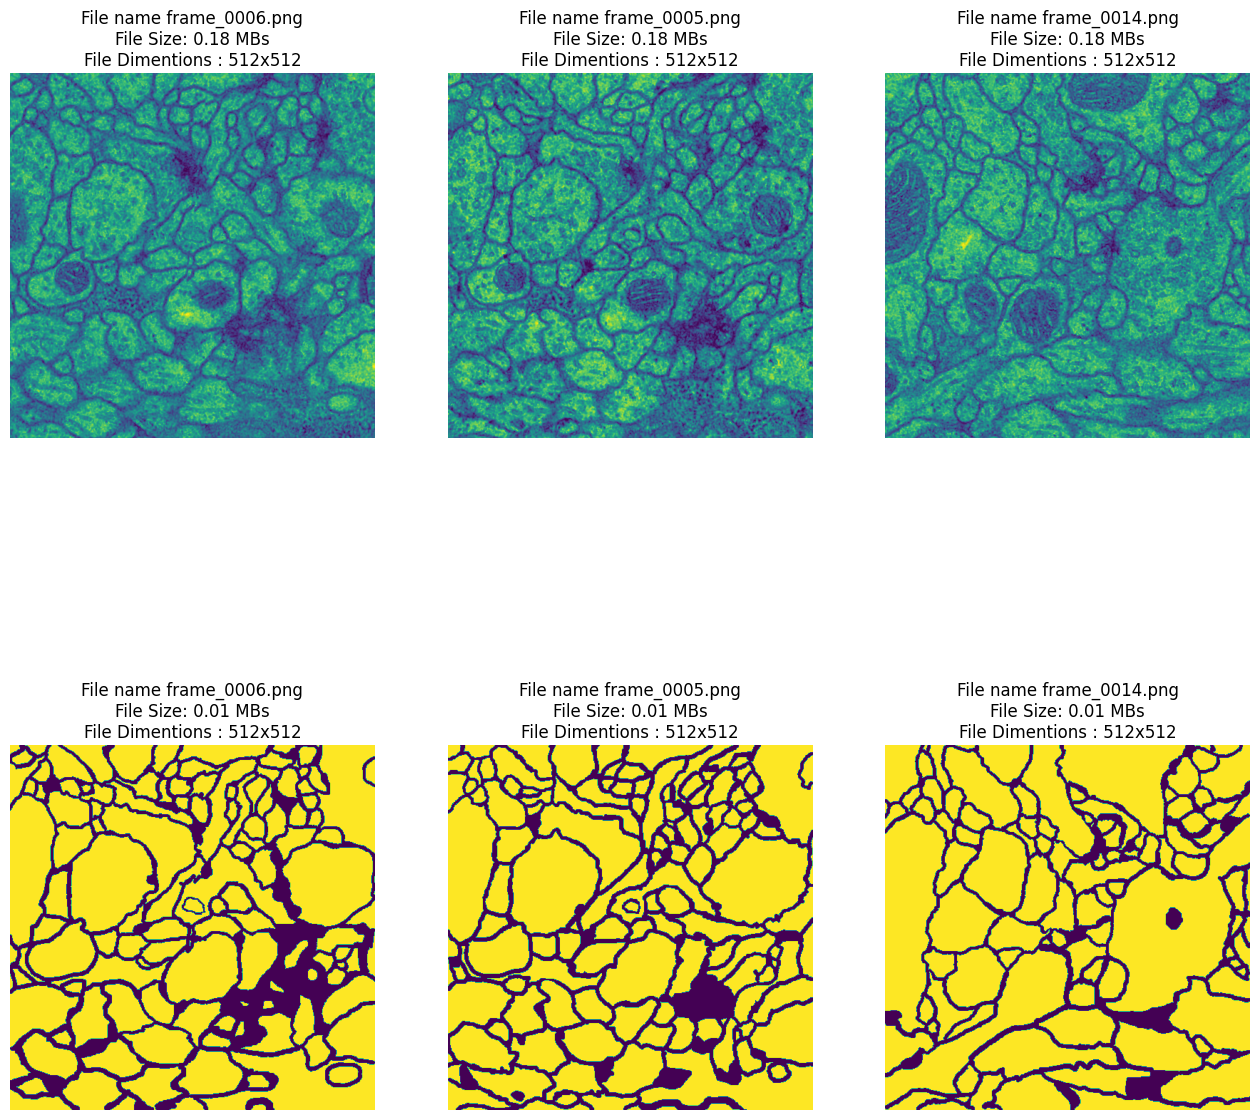

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
for i, item in enumerate(train_img_path.iterdir()):
    if i < 3:
        img = Image.open(item)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis(False)
        title = f"File name {item.name}"
        title += f"\nFile Size: {item.stat().st_size / 1024**2 :.2f} MBs"
        title += f"\nFile Dimentions : {img.height}x{img.width}"
        plt.title(title);

    else:
        break

for i, item in enumerate(train_label_path.iterdir()):
    if i < 3:
        img = Image.open(item)
        plt.subplot(2, 3, i+4)
        plt.imshow(img)
        plt.axis(False)
        title = f"File name {item.name}"
        title += f"\nFile Size: {item.stat().st_size / 1024**2 :.2f} MBs"
        title += f"\nFile Dimentions : {img.height}x{img.width}"
        plt.title(title);

    else:
        break

In [47]:
#%%writefile data_setup.py
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from pathlib import Path
from typing import Tuple
from torch.utils.data import random_split

class ISBIDataset(Dataset):
    def __init__(self,
                 data_dir: str,
                 transforms: torchvision.transforms = None):
        
        self.data_dir = data_dir
        self.transforms = transforms
        
        self.img_paths_list = sorted(list(Path(data_dir).glob("imgs/*.png")))
        self.label_paths_list = sorted(list(Path(data_dir).glob("labels/*.png")))
        self.mask_crop = torchvision.transforms.CenterCrop(size=(324, 324))
    
    def load_images(self, index: int) -> Image.Image:
        img = Image.open(self.img_paths_list[index])
        return img

    def load_masks(self, index: int) -> Image.Image:
        mask = Image.open(self.label_paths_list[index])
        return mask

    def __len__(self) -> int:
        return len(self.img_paths_list)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        img = self.load_images(index= index)
        mask = self.load_masks(index= index)
        if self.transforms:
            return self.transforms(img), self.mask_crop(self.transforms(mask))
        else:
            return img, mask



def create_dataloader_ISBI(train_dir: str,
                      test_dir: str,
                      transforms: torchvision.transforms,
                      num_workers: int = 4,
                      batch_size: int = 1,
                      test_val_split: float = 0.5
                      ) -> Tuple[torch.utils.data.DataLoader, torch.utils.data.Dataset]:


    train_dataset = ISBIDataset(data_dir=train_dir,
                                transforms=transforms)
    test_dataset = ISBIDataset(data_dir=test_dir,
                               transforms=transforms)

    test_split = int(test_val_split * len(test_dataset))
    val_split = int(len(test_dataset) - test_split)

    test_dataset, val_dataset = random_split(dataset= test_dataset, 
                                             lengths=[test_split, val_split])

    train_dataloader = DataLoader(dataset=train_dataset,
                                    batch_size=batch_size,
                                    num_workers=num_workers,
                                    shuffle=True)
    test_dataloader = DataLoader(dataset=test_dataset,
                                    batch_size=batch_size,
                                    num_workers=num_workers,
                                    shuffle=True)
    val_dataloader = DataLoader(dataset=val_dataset,
                                    batch_size=batch_size,
                                    num_workers=num_workers,
                                    shuffle=False)

    return train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset


class CityscapeDataset(Dataset):
    def __init__(self,
                 img_dir: str,
                 mask_dir: str,
                transform: torchvision.transforms = None,
                sample_size: float = 0.2):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform

        self.img_list = sorted(list(Path(img_dir).glob("*/*.png")))
        self.mask_list = sorted(list(Path(mask_dir).glob("*/*labelIds.png")))
        self.sample_size = int(sample_size*len(self.img_list))
        self.img_list, self.mask_list = self.img_list[:self.sample_size], self.mask_list[:self.sample_size]

        self.mask_crop = torchvision.transforms.CenterCrop(size=(324, 836))
        # print(len(self.img_list), len(self.mask_list))
        assert len(self.img_list)==len(self.mask_list), "Number of items in mask directory do not match number of items in image directory"
    def load_images(self, 
                    index: int) -> Image.Image:
        return Image.open(self.img_list[index])

    def load_masks(self,
                   index: int) -> Image.Image:
        return Image.open(self.mask_list[index])

    def __len__(self):
        return len(self.mask_list)

    def __getitem__(self, 
                    index: int) -> Tuple[torch.tensor, torch.tensor]:
        if self.transform:
            return self.transform(self.load_images(index=index)), self.mask_crop(self.transform(self.load_masks(index=index)))

        else:
            return self.load_images(index), self.load_masks(index)


def create_dataloaders_CS(img_dir: str,
                       mask_dir: str,
                       transform: torchvision.transforms,
                      batch_size: int,
                      num_workers: int = 4,
                      sample_size: float = 0.2):

    datasets = {}
    dataloaders = {}
    for item in list(img_dir.iterdir())[::-1]:
        dataset = f"{item}_dataset"
        datasets[dataset] = CityscapeDataset(img_dir=item,
                                          mask_dir=mask_dir / item.stem,
                                          transform=transform,
                                          sample_size=0.1)
        dataloader = f"{item}_dataloader"
        if item.stem != "val":
            dataloaders[dataloader] = DataLoader(dataset=datasets[dataset],
                                                 batch_size=batch_size,
                                                 num_workers=num_workers,
                                                 shuffle=True)
        else:
            dataloaders[dataloader] = DataLoader(dataset=datasets[dataset],
                                                 batch_size=batch_size,
                                                 num_workers=num_workers,
                                                 shuffle=False)
            
    
    return tuple(dataloaders.values()), tuple(datasets.values())

class CarvanaDataset(Dataset):
    def __init__(self,
                 img_dir: str,
                 mask_dir: str,
                 transform: torchvision.transforms,
                 cropsize: Tuple[int, int] = None,
                 sample_size: float = 0.2):
        
        self.transform = transform
        self.img_list = sorted(list(img_dir.glob("*.jpg")))
        self.mask_list = sorted(list(mask_dir.glob("*.png")))
        if cropsize:
            self.center_crop = torchvision.transforms.CenterCrop(size=(cropsize))
        else: 
            self.center_crop = None
        self.sample_size = int(sample_size*len(self.img_list))
        self.mask_list, self.img_list = self.mask_list[: self.sample_size], self.img_list[:self.sample_size]

        assert len(self.img_list)==len(self.mask_list), "Number of images does not match the number of masks"
        
    def load_img(self,
                 index: int):
        return Image.open(self.img_list[index])

    def load_mask(self, 
                  index: int):
        return Image.open(self.mask_list[index])

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self,
                   index: int):

        img = self.load_img(index=index)
        mask = self.load_mask(index=index)

        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask)

        if self.center_crop:
            mask = self.center_crop(mask)

        return img, mask

def create_dataloaders_Carvana(img_dir: str,
                               mask_dir: str,
                               transform: torchvision.transforms,
                               cropsize: Tuple[int, int] = None,
                               sample_size: float = 0.2,
                               batch_size: int = 2,
                               num_workers: int = 4,
                               train_test_val_split: Tuple[float, float, float] = (0.7, 0.2, 0.1)
                              ) -> Tuple[torch.utils.data.DataLoader, torch.utils.data.Dataset]:

    full_dataset = CarvanaDataset(img_dir= img_dir,
                                  mask_dir= mask_dir,
                                  transform= transform,
                                  cropsize= cropsize,
                                  sample_size= sample_size)

    train_split = int(train_test_val_split[0]*len(full_dataset))
    test_split = int(train_test_val_split[1]*len(full_dataset))
    val_split = len(full_dataset) - train_split - test_split
    
    train_dataset, test_dataset, val_dataset = random_split(dataset=full_dataset,
                                                            lengths=[train_split, test_split, val_split]
                                                           )

    train_dataloader = DataLoader(dataset=train_dataset,
                                    batch_size=batch_size,
                                    num_workers=num_workers,
                                    shuffle=True)
    test_dataloader = DataLoader(dataset=test_dataset,
                                    batch_size=batch_size,
                                    num_workers=num_workers,
                                    shuffle=True)
    val_dataloader = DataLoader(dataset=val_dataset,
                                batch_size=batch_size,
                                num_workers=num_workers,
                                shuffle=False)

    return train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset




In [3]:
from torchvision import transforms
import random
# transforms = transforms.Compose([transforms.RandomAffine(degrees=0,
#                                                          translate=(0.1,0.1)),
#                                      transforms.RandomRotation(degrees=10,
#                                                                interpolation=transforms.InterpolationMode.BICUBIC),
#                                      transforms.ElasticTransform(alpha=10.0, 
#                                                                 sigma=3.0, 
#                                                                  interpolation=transforms.InterpolationMode.BICUBIC),
#                                      transforms.ColorJitter(brightness=0.2),
#                                      transforms.ToTensor()
#                                                          ])
transforms = transforms.Compose([transforms.ToTensor()])

In [11]:
from data_setup import create_dataloader_ISBI
train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset = create_dataloader_ISBI(train_dir=data_path / "train",
                                                                      test_dir=data_path / "test",
                                                                      transforms=transforms,
                                                                      batch_size=1,
                                                                      num_workers=4,
                                                                     test_val_split=0.5)
train_dataloader, test_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb674b8e5f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb56507b130>)

In [12]:
len(train_dataloader), len(test_dataloader), len(val_dataloader)

(30, 15, 15)

(torch.Size([1, 1, 512, 512]),
 torch.Size([1, 1, 324, 324]),
 tensor([0, 1], dtype=torch.int32))

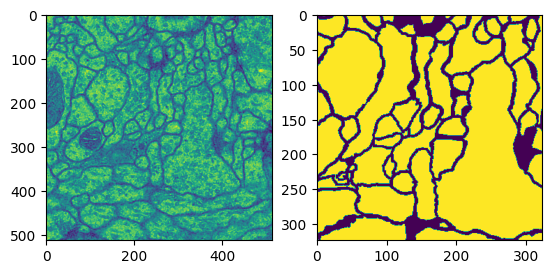

In [14]:
X, y = next(iter(train_dataloader))
X.shape, y.shape, X.dtype, y.dtype
plt.subplot(1,2,1)
plt.imshow(X[0].squeeze())
plt.subplot(1,2,2)
plt.imshow(y[0].squeeze())
X.shape, y.shape, (y[0]).type(torch.int32).unique()

In [33]:
#%%writefile model.py

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

class DoubleDownSample(nn.Module):
    def __init__(self,
                 in_channels: int,
                 out_channels: int):
        
        super().__init__()
        
        self.downsample_block = nn.Sequential(nn.Conv2d(in_channels=in_channels,
                                                        out_channels=out_channels,
                                                        kernel_size=3,
                                                        stride=1,
                                                        padding=0),
                                              nn.ReLU(),
                                              nn.Conv2d(in_channels=out_channels,
                                                        out_channels=out_channels,
                                                        kernel_size=3,
                                                        stride=1,
                                                        padding=0),
                                              nn.ReLU()
                                             )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.downsample_block(x)
        # print(x.shape)
        return x


class DoubleUpSample(nn.Module):
    def __init__(self,
                 in_channels: int,
                 out_channels: int):

        super().__init__()

        self.Upsample = nn.Sequential(nn.Upsample(scale_factor=2,
                                                  mode='bilinear'),
                                      nn.Conv2d(in_channels=in_channels,
                                                out_channels=out_channels,
                                                kernel_size=1,
                                                stride=1,
                                                padding=0)
                                     )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.Upsample(x)
        # print(x.shape)
        return x
        
class UNet(nn.Module):
    def __init__(self,
                 in_channels: int,
                 out_channels: int):
        
        super().__init__()

        self.feature_expansion = [64, 128, 256, 512]
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        self.downsample = nn.ModuleList()
        self.upsample = nn.ModuleList()
        self.resample = nn.ModuleList()

        self.double_downsample = nn.Conv2d(in_channels= self.feature_expansion[-1]*2,
                                           out_channels= self.feature_expansion[-1]*2,
                                           kernel_size=3,
                                           stride=1,
                                           padding=0)
        
        for feature in self.feature_expansion:
            self.downsample.append(DoubleDownSample(in_channels=self.in_channels,
                                                    out_channels=feature))
            self.in_channels = feature

        for feature in reversed(self.feature_expansion):
            self.upsample.append(DoubleUpSample(in_channels=feature*2,
                                                out_channels= feature))

        for feature in reversed(self.feature_expansion):
            self.resample.append(DoubleDownSample(in_channels=feature*2,
                                                  out_channels=feature))

        self.maxpool = nn.MaxPool2d(kernel_size=2,
                                    stride=2)
        
        self.bottleneck = nn.Conv2d(in_channels=self.feature_expansion[-1],
                                    out_channels=self.feature_expansion[-1]*2,
                                    kernel_size=3,
                                    stride=1,
                                    padding=0)
        self.final_conv = nn.Conv2d(in_channels=self.feature_expansion[0],
                                    out_channels=self.out_channels,
                                    kernel_size=1,
                                   stride=1,
                                   padding=0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        residual_connections = []
        for down in self.downsample:
            x =  down(x)
            residual_connections.append(x)
            x = self.maxpool(x)

        x = self.bottleneck(x)
        x = self.double_downsample(x)
        # print(x.shape)
        residual_connections = residual_connections[::-1]
        for i, up in enumerate(self.upsample):
            x = up(x)
            center_crop = transforms.CenterCrop(size=(x.shape[2], x.shape[3]))
            x = torch.cat((x, center_crop(residual_connections[i])), dim=1)
            # print(x.shape)
            x = self.resample[i](x)
            # print(x.shape)

        return self.final_conv(x)
    

In [8]:
from model import UNet
tensor = torch.randn([3, 3, 512, 512], dtype = torch.float32)

model = UNet(in_channels=3,
             out_channels=1)

model.eval()
with torch.inference_mode():
    y_preds = model(tensor)

y_preds.shape

torch.Size([3, 1, 324, 324])

In [46]:
from torchinfo import summary

summary(model = model,
        input_size=(6, 3, 572, 572),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=16,
        row_settings=["var_names"],
        verbose=0)

Layer (type (var_name))                       Input Shape      Output Shape     Param #          Trainable
UNet (UNet)                                   [6, 3, 572, 572] [6, 4, 388, 388] --               True
├─ModuleList (downsample)                     --               --               (recursive)      True
│    └─DoubleDownSample (0)                   [6, 3, 572, 572] [6, 64, 568, 568] --               True
│    │    └─Sequential (downsample_block)     [6, 3, 572, 572] [6, 64, 568, 568] 38,720           True
├─MaxPool2d (maxpool)                         [6, 64, 568, 568] [6, 64, 284, 284] --               --
├─ModuleList (downsample)                     --               --               (recursive)      True
│    └─DoubleDownSample (1)                   [6, 64, 284, 284] [6, 128, 280, 280] --               True
│    │    └─Sequential (downsample_block)     [6, 64, 284, 284] [6, 128, 280, 280] 221,440          True
├─MaxPool2d (maxpool)                         [6, 128, 280, 280] [6, 

In [46]:
#%%writefile engine.py
"""
Containsfunctions for traning and testing PyTorch model.
"""

import torch
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step_ISBI(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """
    Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then runs through all of 
    the required training steps.

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """

    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_preds = model(X)
        y_preds_labels = torch.sigmoid(y_preds)
        binary_preds_labels = torch.round(y_preds_labels).type(torch.int32)
        loss = loss_fn(y_preds.squeeze(), y.squeeze())
        train_loss += loss.item()
        acc = torch.sum(binary_preds_labels==y.type(torch.int32)).item()/y.numel()
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step_ISBI(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:

    """
    Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to evaluation mode and then runs through all of 
    the required testing steps.

    Args:
    model: A PyTorch model to be evaluated.
    dataloader: A DataLoader instance for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_preds = model(X)
            test_preds_labels = torch.sigmoid(test_preds)
            loss = loss_fn(test_preds.squeeze(), y.squeeze())
            test_preds_labels = torch.round(test_preds_labels).type(torch.int32)
            acc = torch.sum(test_preds_labels==y.type(torch.int32)).item()/test_preds_labels.numel()
            test_loss += loss.item()
            test_acc += acc

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

def train_ISBI(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:

    """Trains a PyTorch model for the number of input epochs.

    Passes a target PyTorch model through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Args:
    model: A PyTorch model to be trained.
    train_dataloader: A PyTOrch dataloader for the model to be trained on.
    test_dataloader: A PyTorch dataloader for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A dictionary containing the training and testing loss as well as accuracy
    metrics. Each metric has a value in a list for each epoch.
    In the form: {train_loss: [...],
                    train_acc: [...],
                    test_loss: [...],
                    test_acc: [...]}

    For example if training for epochs = 3:
                {train_loss: [2.0619, 1.0537, 0.9124],
                train_acc: [0.39, 0.42, 0.56],
                test_loss: [2.1319, 1.5667, 1.1234],
                test_acc: [0.37, 0.48, 0.67]}
    """
    results = {"train_loss" :[],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step_ISBI(model = model,
                                           dataloader= train_dataloader,
                                           loss_fn= loss_fn,
                                           optimizer= optimizer,
                                           device = device)
        test_loss, test_acc = test_step_ISBI(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)

        print(f" Epoch {epoch + 1} |"
                f" train_loss: {train_loss:.4f} |"
                f" train_acc: {train_acc:.2f} |"
                f" test_loss: {test_loss:.4f} |"
                f" test_acc: {test_acc:.2f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

def train_step_CS(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """
    Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then runs through all of 
    the required training steps.

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """

    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_preds = model(X)
        y_preds_labels = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
        loss = loss_fn(y_preds, (y*255).squeeze(dim=1).round().long())
        train_loss += loss.item()
        acc = torch.sum(y_preds_labels.type(torch.int32) == (y*255).squeeze(dim=1).type(torch.int32))/y_preds_labels.numel()
        train_acc += acc.item()
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step_CS(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:

    """
    Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to evaluation mode and then runs through all of 
    the required testing steps.

    Args:
    model: A PyTorch model to be evaluated.
    dataloader: A DataLoader instance for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_preds = model(X)
            test_preds_labels = torch.argmax(torch.softmax(test_preds, dim=1), dim=1)
            loss = loss_fn(test_preds, (y*255).squeeze(dim=1).round().long())
            acc = torch.sum(test_preds_labels.type(torch.int32) == (y*255).squeeze(dim=1).type(torch.int32))/test_preds_labels.numel()
            test_loss += loss.item()
            test_acc += acc.item()

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

def train_CS(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:

    """Trains a PyTorch model for the number of input epochs.

    Passes a target PyTorch model through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Args:
    model: A PyTorch model to be trained.
    train_dataloader: A PyTOrch dataloader for the model to be trained on.
    test_dataloader: A PyTorch dataloader for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A dictionary containing the training and testing loss as well as accuracy
    metrics. Each metric has a value in a list for each epoch.
    In the form: {train_loss: [...],
                    train_acc: [...],
                    test_loss: [...],
                    test_acc: [...]}

    For example if training for epochs = 3:
                {train_loss: [2.0619, 1.0537, 0.9124],
                train_acc: [0.39, 0.42, 0.56],
                test_loss: [2.1319, 1.5667, 1.1234],
                test_acc: [0.37, 0.48, 0.67]}
    """
    results = {"train_loss" :[],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step_CS(model = model,
                                           dataloader= train_dataloader,
                                           loss_fn= loss_fn,
                                           optimizer= optimizer,
                                           device = device)
        test_loss, test_acc = test_step_CS(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)

        print(f" Epoch {epoch + 1} |"
                f" train_loss: {train_loss:.4f} |"
                f" train_acc: {train_acc:.2f} |"
                f" test_loss: {test_loss:.4f} |"
                f" test_acc: {test_acc:.2f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

def train_step_CV(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """
    Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then runs through all of 
    the required training steps.

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """

    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_preds = model(X)
        y_preds_labels = torch.sigmoid(y_preds)
        binary_preds_labels = torch.round(y_preds_labels).type(torch.int32)
        loss = loss_fn(y_preds.squeeze(dim=1), (y*255).squeeze(dim=1))
        train_loss += loss
        acc = torch.sum(binary_preds_labels==(y*255).type(torch.int32)).item()/y.numel()
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step_CV(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:

    """
    Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to evaluation mode and then runs through all of 
    the required testing steps.

    Args:
    model: A PyTorch model to be evaluated.
    dataloader: A DataLoader instance for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_preds = model(X)
            test_preds_labels = torch.sigmoid(test_preds)
            loss = loss_fn(test_preds.squeeze(dim=1), (y*255).squeeze(dim=1))
            test_preds_labels = torch.round(test_preds_labels).type(torch.int32)
            acc = torch.sum(test_preds_labels==(y*255).squeeze().type(torch.int32)).item()/y.numel()
            test_loss += loss
            test_acc += acc

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

def train_CV(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:

    """Trains a PyTorch model for the number of input epochs.

    Passes a target PyTorch model through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Args:
    model: A PyTorch model to be trained.
    train_dataloader: A PyTOrch dataloader for the model to be trained on.
    test_dataloader: A PyTorch dataloader for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A dictionary containing the training and testing loss as well as accuracy
    metrics. Each metric has a value in a list for each epoch.
    In the form: {train_loss: [...],
                    train_acc: [...],
                    test_loss: [...],
                    test_acc: [...]}

    For example if training for epochs = 3:
                {train_loss: [2.0619, 1.0537, 0.9124],
                train_acc: [0.39, 0.42, 0.56],
                test_loss: [2.1319, 1.5667, 1.1234],
                test_acc: [0.37, 0.48, 0.67]}
    """
    results = {"train_loss" :[],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step_CV(model = model,
                                           dataloader= train_dataloader,
                                           loss_fn= loss_fn,
                                           optimizer= optimizer,
                                           device = device)
        test_loss, test_acc = test_step_CV(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)

        print(f" Epoch {epoch + 1} |"
                f" train_loss: {train_loss:.4f} |"
                f" train_acc: {train_acc:.4f} |"
                f" test_loss: {test_loss:.4f} |"
                f" test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [ ]:
import torch.nn as nn
from engine import train_ISBI

model_0 = UNet(in_channels=1,
              out_channels=1)
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = nn.BCEWithLogitsLoss(reduction = "none")
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.001,
                            momentum=0.9)

results = train_ISBI(model= model_0,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                device=device,
                epochs=20,
                weight_map=True)

In [1]:
import kagglehub
import shutil
from pathlib import Path
from download_data import download_data

data_path = download_data(dataset_name="Cityscape")

data/CityScape exists, skipping creation...
Data already exists in working directory: data/CityScape


In [2]:
import os

for (root, dirs, files) in os.walk(top=data_path):
    print(f"Root Directory: {root} \nDirectory Names: {dirs} \nFiles: {len(files)}")
    

Root Directory: data/CityScape 
Directory Names: ['Cityscape Dataset', 'Fine Annotations'] 
Files: 0
Root Directory: data/CityScape/Cityscape Dataset 
Directory Names: ['leftImg8bit'] 
Files: 2
Root Directory: data/CityScape/Cityscape Dataset/leftImg8bit 
Directory Names: ['val', 'train', 'test'] 
Files: 0
Root Directory: data/CityScape/Cityscape Dataset/leftImg8bit/val 
Directory Names: ['munster', 'frankfurt', 'lindau'] 
Files: 0
Root Directory: data/CityScape/Cityscape Dataset/leftImg8bit/val/munster 
Directory Names: [] 
Files: 174
Root Directory: data/CityScape/Cityscape Dataset/leftImg8bit/val/frankfurt 
Directory Names: [] 
Files: 267
Root Directory: data/CityScape/Cityscape Dataset/leftImg8bit/val/lindau 
Directory Names: [] 
Files: 59
Root Directory: data/CityScape/Cityscape Dataset/leftImg8bit/train 
Directory Names: ['krefeld', 'ulm', 'jena', 'erfurt', 'tubingen', 'weimar', 'aachen', 'monchengladbach', 'strasbourg', 'darmstadt', 'hamburg', 'bremen', 'zurich', 'hanover', 'stu

In [3]:
with open(data_path /"Cityscape Dataset" / "README", "r") as f:
    print(f.read())


README and scripts
------------------

The README and various scripts for inspection, preparation, and evaluation can be found in our git repository:
https://github.com/mcordts/cityscapesScripts

Contact
-------

Marius Cordts, Mohamed Omran
www.cityscapes-dataset.net
mail@cityscapes-dataset.net



In [4]:
train_image_dir = data_path / "Cityscape Dataset" / "leftImg8bit" / "train"
train_image_list = sorted(list(train_image_dir.glob("*/*.png")))

test_image_dir = data_path / "Cityscape Dataset" / "leftImg8bit" / "test"
test_image_list = sorted(list(test_image_dir.glob("*/*.png")))

val_image_dir = data_path / "Cityscape Dataset" / "leftImg8bit" / "val"
val_image_list = sorted(list(val_image_dir.glob("*/*.png")))

train_mask_dir = data_path / "Fine Annotations" / "gtFine" / "train"
train_mask_list = sorted(list(train_mask_dir.glob("*/*labelIds.png")))

test_mask_dir = data_path / "Fine Annotations" / "gtFine" / "test"
test_mask_list = sorted(list(test_mask_dir.glob("*/*labelIds.png")))

val_mask_dir = data_path / "Fine Annotations" / "gtFine" / "val"
val_mask_list = sorted(list(val_mask_dir.glob("*/*labelIds.png")))

print(f"Training image samples: {len(train_image_list)} \nTesting image samples: {len(test_image_list)} \nValidation image samples: {len(val_image_list)}")
print(f"Training mask  samples: {len(train_mask_list)} \nTesting mask samples: {len(test_mask_list)} \nValidation mask samples: {len(val_mask_list)}")

Training image samples: 2975 
Testing image samples: 1525 
Validation image samples: 500
Training mask  samples: 2975 
Testing mask samples: 1525 
Validation mask samples: 500


/home/sarmadahmad8/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


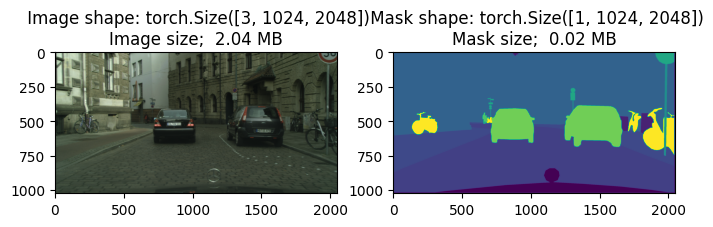

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

tensorize = transforms.ToTensor()
visualize_image = Image.open(train_image_list[300])
visualize_mask = Image.open(train_mask_list[300])

img_tensor, mask_tensor = tensorize(visualize_image), tensorize(visualize_mask)
plt.figure(figsize=(8, 16))
plt.subplot(1, 2, 1)
plt.imshow(visualize_image)
plt.title(f" Image shape: {img_tensor.shape}\nImage size; {train_image_list[0].stat().st_size / 1024**2: .2f} MB")
plt.subplot(1, 2, 2)
plt.imshow(visualize_mask)
plt.title(f" Mask shape: {mask_tensor.shape}\nMask size; {train_mask_list[0].stat().st_size / 1024**2: .2f} MB");

In [6]:
import torch
for i in range(mask_tensor.shape[0]):
    print(f"Pixel values in mask channel {i+1} are:\n{(mask_tensor[i].unique()*255).type(torch.int32)}")

Pixel values in mask channel 1 are:
tensor([ 1,  3,  4,  7,  8, 11, 17, 20, 24, 26, 33], dtype=torch.int32)


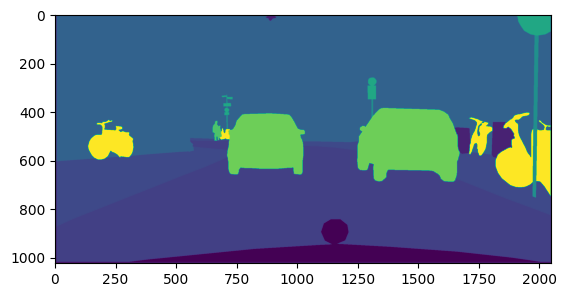

In [7]:
plt.imshow(mask_tensor.permute(1, 2, 0))

In [8]:
img_dir= data_path / "Cityscape Dataset" / "leftImg8bit"
for item in list(img_dir.iterdir())[::-1]:
    print(item.stem, type(item.stem))

mask_dir= data_path / "Fine Annotations" / "gtFine"
for item in list(mask_dir.iterdir())[::-1]:
    print(item)

test <class 'str'>
train <class 'str'>
val <class 'str'>
data/CityScape/Fine Annotations/gtFine/test
data/CityScape/Fine Annotations/gtFine/train
data/CityScape/Fine Annotations/gtFine/val


Length of train dataset: 892
Length of train dataloaders: 892 and test dataloader: 457


tensor([0], dtype=torch.int32)

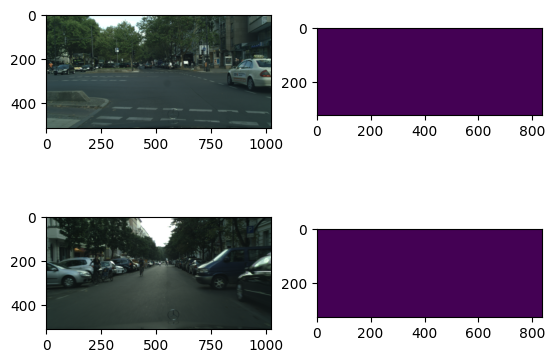

In [9]:
from data_setup import create_dataloaders_CS

transform = transforms.Compose([transforms.Resize(size=(512, 1024)),
                                transforms.ToTensor()
                               ])

(test_dataloader, train_dataloader, val_dataloader), (test_dataset, train_dataset, val_dataset) = create_dataloaders_CS(img_dir= data_path / "Cityscape Dataset" / "leftImg8bit",
                                                                                                                       mask_dir= data_path / "Fine Annotations" / "gtFine",
                                                                                                                       transform=transform,
                                                                                                                          batch_size=1,
                                                                                                                       sample_size=0.3)
print(f"Length of train dataset: {len(train_dataset)}")
X, y = test_dataset[12]
plt.subplot(2,2,1)
plt.imshow(X.permute(1, 2, 0))
plt.subplot(2,2,2)
plt.imshow(y.permute(1, 2, 0))
X.shape, y.shape

print(f"Length of train dataloaders: {len(train_dataloader)} and test dataloader: {len(test_dataloader)}")
X, y = next(iter(test_dataloader))
plt.subplot(2, 2, 3)
plt.imshow(X[0].permute(1, 2, 0))
plt.subplot(2, 2, 4)
plt.imshow(y[0].permute(1, 2, 0))
(y[0]*255).unique().type(torch.int32)

In [10]:
import numpy as np
from scipy.ndimage import distance_transform_edt, binary_erosion
from skimage.measure import label

class WeightMap:
    def __init__(self,
                 w0=10,
                 sigma=5):
        self.w0 = w0
        self.sigma = sigma

    def compute_wc(self,
                   mask):
        # binary mask → class weights
        classes, counts = np.unique(mask, return_counts=True)
        freq = counts / counts.sum()
        class_weight = {cls: 1.0 / freq[i] for i, cls in enumerate(classes)}

        wc = np.zeros_like(mask, dtype=np.float32)
        for cls, w in class_weight.items():
            wc[mask == cls] = w
        return wc

    def compute_d1_d2(self,
                      instance_mask):
        h, w = instance_mask.shape
        borders = []

        instance_ids = [i for i in np.unique(instance_mask) if i != 0]

        for inst in instance_ids:
            obj = (instance_mask == inst)
            eroded = binary_erosion(obj)
            border = obj ^ eroded
            borders.append(border)

        if len(borders) == 0:
            return np.zeros((h, w)), np.zeros((h, w))

        distances = np.stack([distance_transform_edt(~b) for b in borders], axis=0)
        distance_sorted = np.sort(distances, axis=0)

        d1 = distance_sorted[0]
        d2 = distance_sorted[1] if len(distance_sorted) > 1 else np.full_like(d1, 1e-6)

        return d1, d2

    def compute_weight_map(self,
                           binary_mask):
        instance_mask = label(binary_mask)

        wc = self.compute_wc(binary_mask)
        d1, d2 = self.compute_d1_d2(instance_mask)

        boundary_term = self.w0 * np.exp(-((d1 + d2)**2) / (2 * (self.sigma**2)))
        return (wc + boundary_term).astype(np.float32)

    def compute_weight_map_multiclass(self,
                                      mask):
        
        h, w = mask.shape

        wc = self.compute_wc(mask)

        wb = np.zeros(shape=(h, w), dtype=np.float32)

        classes = np.unique(ar=mask)

        classes = classes[classes != 0]

        for cls in classes:
            binary_mask = (mask == cls)

            instance_mask = label(binary_mask)

            d1, d2 = self.compute_d1_d2(instance_mask=instance_mask)

            wb_cls = self.w0 * np.exp(-((d1 + d2) ** 2) / (2 * ( self.sigma ** 2)))

            wb += wb_cls

        return (wc + wb).astype(np.float32)

        
# w = WeightMap(w0= 10, sigma=5).compute_weight_map(binary_mask=(y_1*255).squeeze().type(torch.int32).numpy())
# w.shape

/usr/lib/python3/dist-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 45.0.0.
  "class": algorithms.Blowfish,
/usr/lib/python3/dist-packages/paramiko/transport.py:261: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [11]:
from model import UNet
from engine import train_CS

model_0 = UNet(in_channels=3,
              out_channels=34)
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01,
                            momentum=0.9)

results = train_CS(model= model_0,
                train_dataloader=train_dataloader,
                test_dataloader=val_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                device=device,
                epochs=30)

  0%|          | 0/30 [00:00<?, ?it/s]

 Epoch 1 | train_loss: 2.0771 | train_acc: 0.41 | test_loss: 2.1216 | test_acc: 0.42
 Epoch 2 | train_loss: 1.8112 | train_acc: 0.48 | test_loss: 1.9623 | test_acc: 0.48
 Epoch 3 | train_loss: 1.7060 | train_acc: 0.51 | test_loss: 1.9125 | test_acc: 0.50
 Epoch 4 | train_loss: 1.6555 | train_acc: 0.52 | test_loss: 1.9191 | test_acc: 0.51
 Epoch 5 | train_loss: 1.5994 | train_acc: 0.54 | test_loss: 1.8283 | test_acc: 0.52
 Epoch 6 | train_loss: 1.5546 | train_acc: 0.56 | test_loss: 1.8893 | test_acc: 0.50
 Epoch 7 | train_loss: 1.5088 | train_acc: 0.57 | test_loss: 1.7874 | test_acc: 0.55
 Epoch 8 | train_loss: 1.4525 | train_acc: 0.58 | test_loss: 1.5929 | test_acc: 0.57
 Epoch 9 | train_loss: 1.3928 | train_acc: 0.61 | test_loss: 1.5549 | test_acc: 0.60
 Epoch 10 | train_loss: 1.3344 | train_acc: 0.63 | test_loss: 1.6997 | test_acc: 0.60
 Epoch 11 | train_loss: 1.2889 | train_acc: 0.64 | test_loss: 1.4126 | test_acc: 0.62
 Epoch 12 | train_loss: 1.2596 | train_acc: 0.65 | test_loss: 1

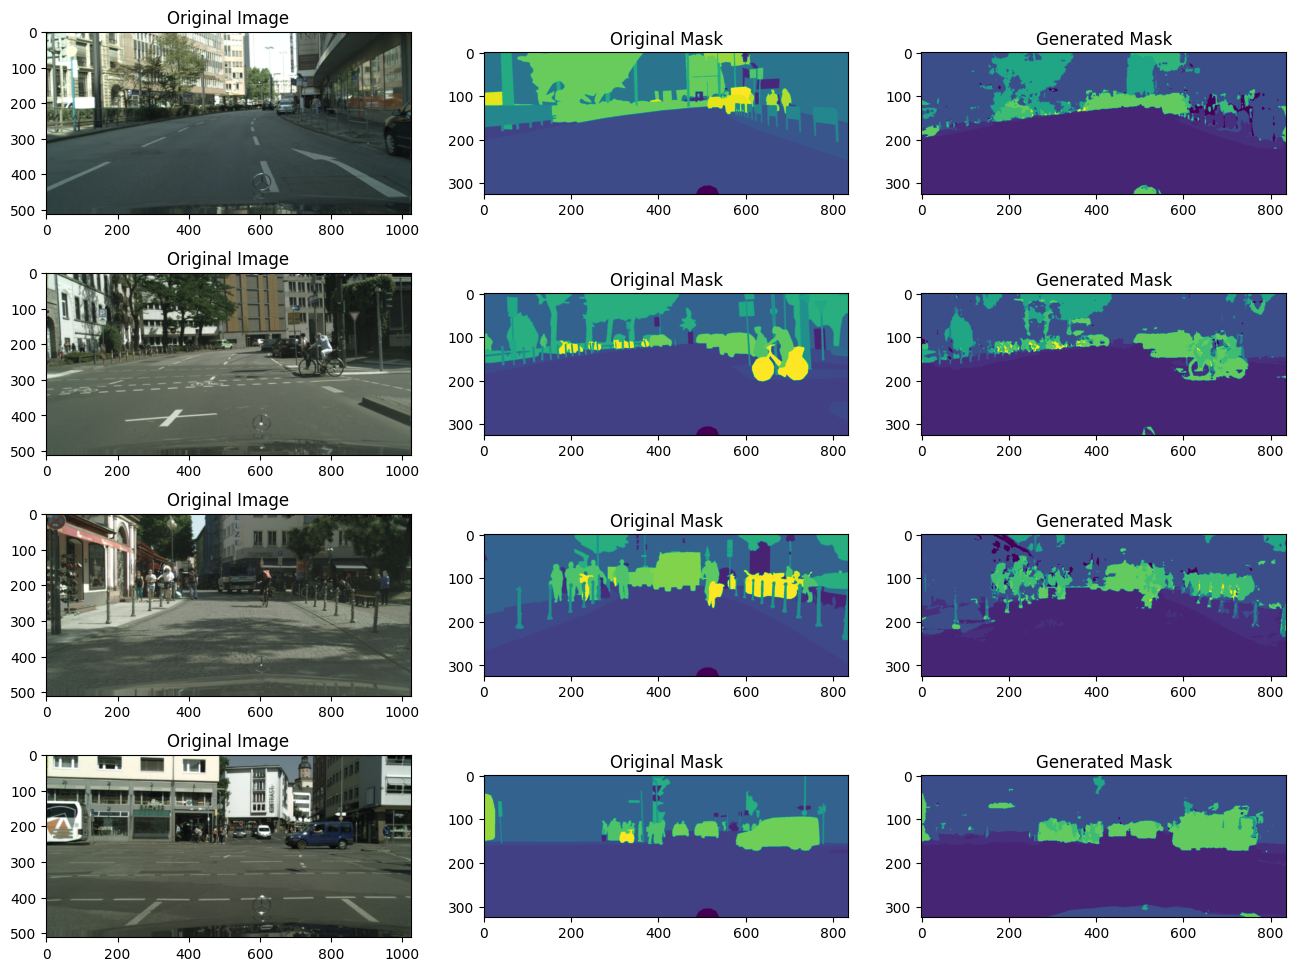

In [11]:
from model import UNet
from utils import generate_and_display_CE

model_0 = UNet(in_channels=3,
               out_channels=34)
model_0.load_state_dict(torch.load(f="models/UNet-CityScape-0.3-30epochs.pth"))

generate_and_display_CE(model=model_0,
                     dataset=val_dataset,
                     samples=4,
                     device="cpu")

In [11]:
from model import UNet
from evaluate_model import evaluate_model_CE
model_0 = UNet(in_channels=3,
               out_channels=34)
model_0.load_state_dict(torch.load(f="models/UNet-CityScape-0.3-30epochs.pth"))
device = "cuda" if torch.cuda.is_available() else "cpu"

results = evaluate_model_CE(model=model_0,
                         dataloader=val_dataloader,
                         device=device)

Evaluation Loss: 1.18491 | Evaluation Accuracy: 0.70%


In [12]:
from download_data import download_data

data_path = download_data("Carvana")

data/Carvana exists, skipping creation...
Data already exists in working directory: data/Carvana


In [13]:
import os
for root, directories, files in os.walk(top=data_path):
    print(f"{root} directory contains directories: {directories} with number of files: {len(files)}")

data/Carvana directory contains directories: ['train_images', 'train_masks'] with number of files: 0
data/Carvana/train_images directory contains directories: [] with number of files: 5088
data/Carvana/train_masks directory contains directories: ['.ipynb_checkpoints'] with number of files: 5088
data/Carvana/train_masks/.ipynb_checkpoints directory contains directories: [] with number of files: 1


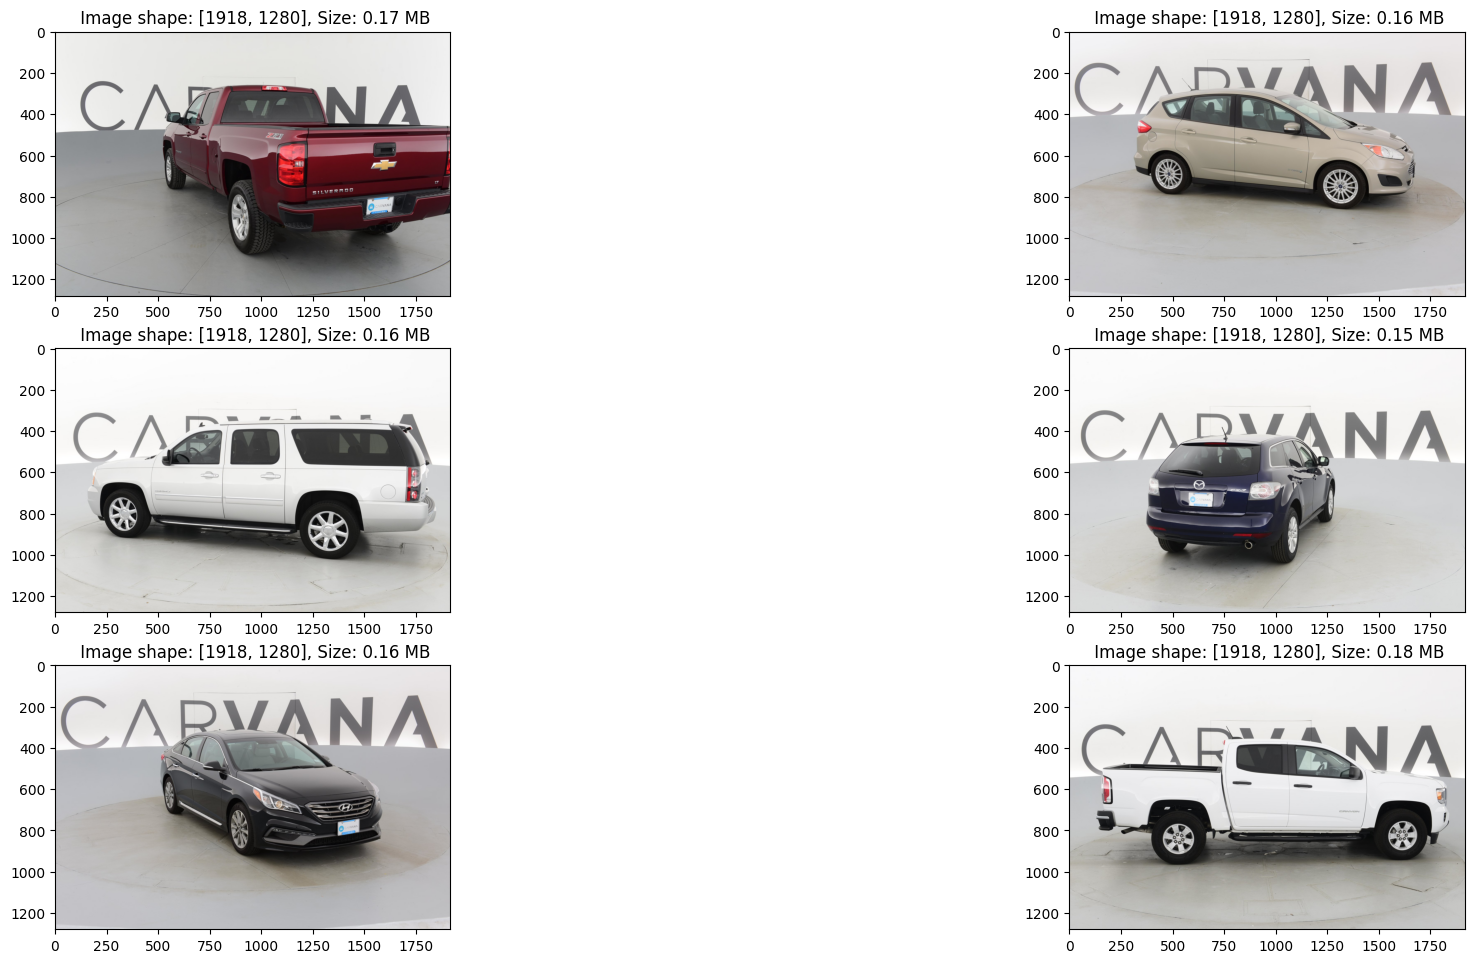

In [14]:
import random
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

img_list = list(Path(data_path / "train_images").glob("*.jpg"))

rand_idx = random.sample(range(0, len(img_list)), k=6)

plt.figure(figsize=(len(rand_idx)*4, len(rand_idx)*4))
for i, idx in enumerate(rand_idx):
    plt.subplot(len(rand_idx), 2, i+1)
    img = Image.open(img_list[idx])
    plt.imshow(img)
    plt.title(f" Image shape: [{img.width}, {img.height}], Size: {img_list[idx].stat().st_size / 1024**2:.2f} MB")

In [15]:
import torchvision
import torch
from data_setup import create_dataloaders_Carvana

carvana_transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size=(512, 1024)),
                                                    torchvision.transforms.ToTensor()
                                                   ])

train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset = create_dataloaders_Carvana(img_dir=data_path / "train_images",
                                                                                                                         mask_dir=data_path / "train_masks",
                                                                                                                         transform= carvana_transform,
                                                                                                                         cropsize = (324, 836),
                                                                                                                         sample_size = 0.1,
                                                                                                                         batch_size=1,
                                                                                                                         num_workers=4,
                                                                                                                        train_test_val_split=(0.7, 0.2, 0.1))  

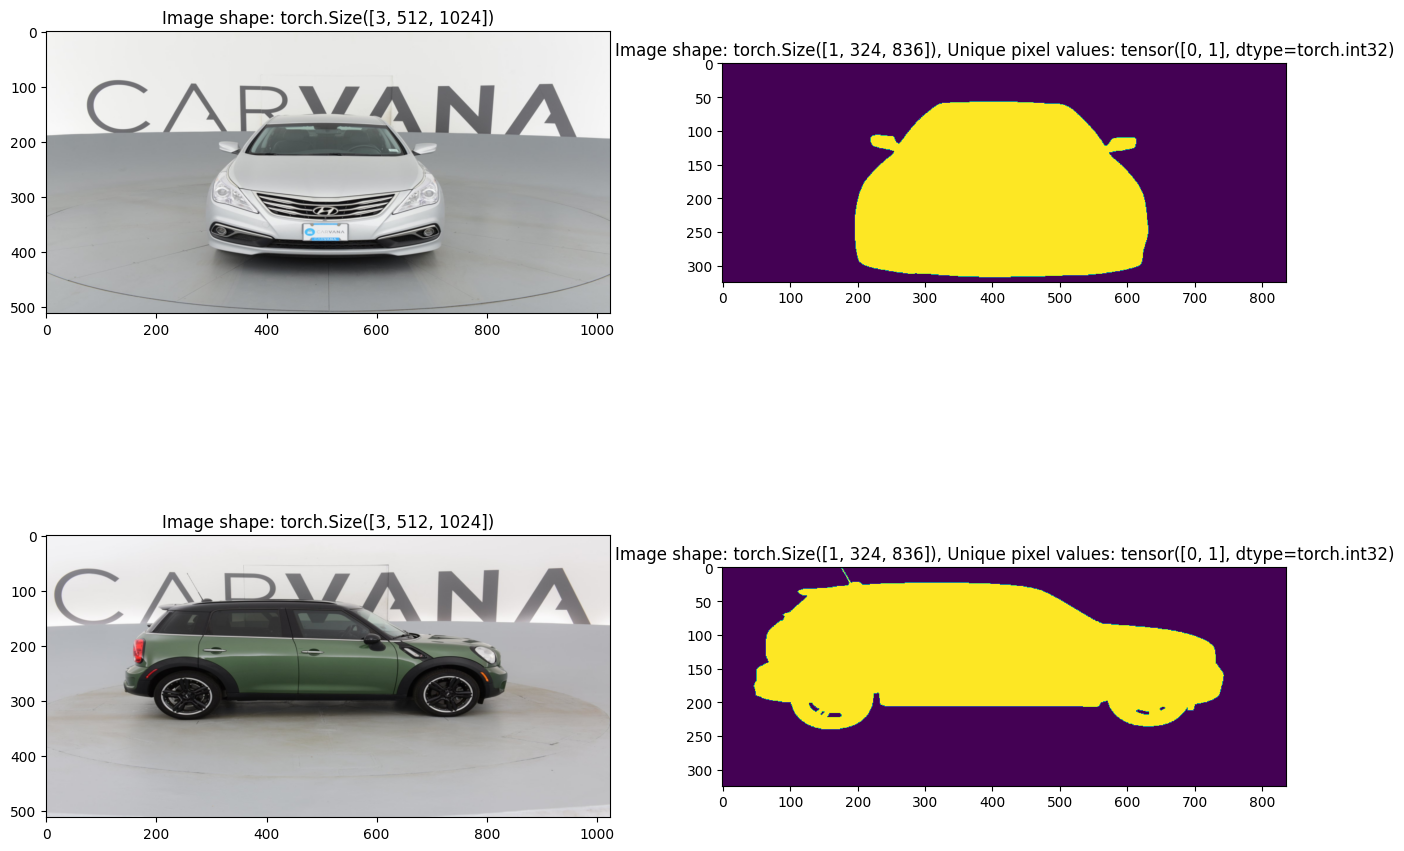

In [16]:
X, y = train_dataset[0]
X_1, y_1 = next(iter(train_dataloader))

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.imshow(X.permute(1, 2, 0))
plt.title(f"Image shape: {X.shape}")

plt.subplot(2, 2, 2)
plt.imshow(y.permute(1, 2, 0))
plt.title(f"Image shape: {y.shape}, Unique pixel values: {(y.unique()*255).type(torch.int32)}")

plt.subplot(2, 2, 3)
plt.imshow(X_1[0].permute(1, 2, 0))
plt.title(f"Image shape: {X_1[0].shape}")

plt.subplot(2, 2, 4)
plt.imshow(y_1[0].permute(1, 2, 0))
plt.title(f"Image shape: {y_1[0].shape}, Unique pixel values: {(y_1[0].unique()*255).type(torch.int32)}");

In [17]:
len(train_dataset), len(test_dataset), len(val_dataset), len(train_dataloader), len(test_dataloader), len(val_dataloader)

(355, 101, 52, 355, 101, 52)

In [ ]:
from model import UNet
from engine import train_CV

device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = UNet(in_channels=3,
               out_channels=1).to(device=device)

# model_0.load_state_dict(torch.load("models/UNet-Carvana-0.1-40epochs.pth"))

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01,
                            momentum=0.9)

# optimizer.load_state_dict(torch.load("optimizers/UNet-Carvana-0.1-40epochs.pth"))

results = train_CV(model= model_0,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     loss_fn=loss_fn,
                     optimizer=optimizer,
                     device= device,
                    epochs=20,
                  weight_map=True)

  0%|          | 0/20 [00:00<?, ?it/s]

 Epoch 1 | train_loss: 1.5794 | train_acc: 0.6953 | test_loss: 1.4084 | test_acc: 0.7523


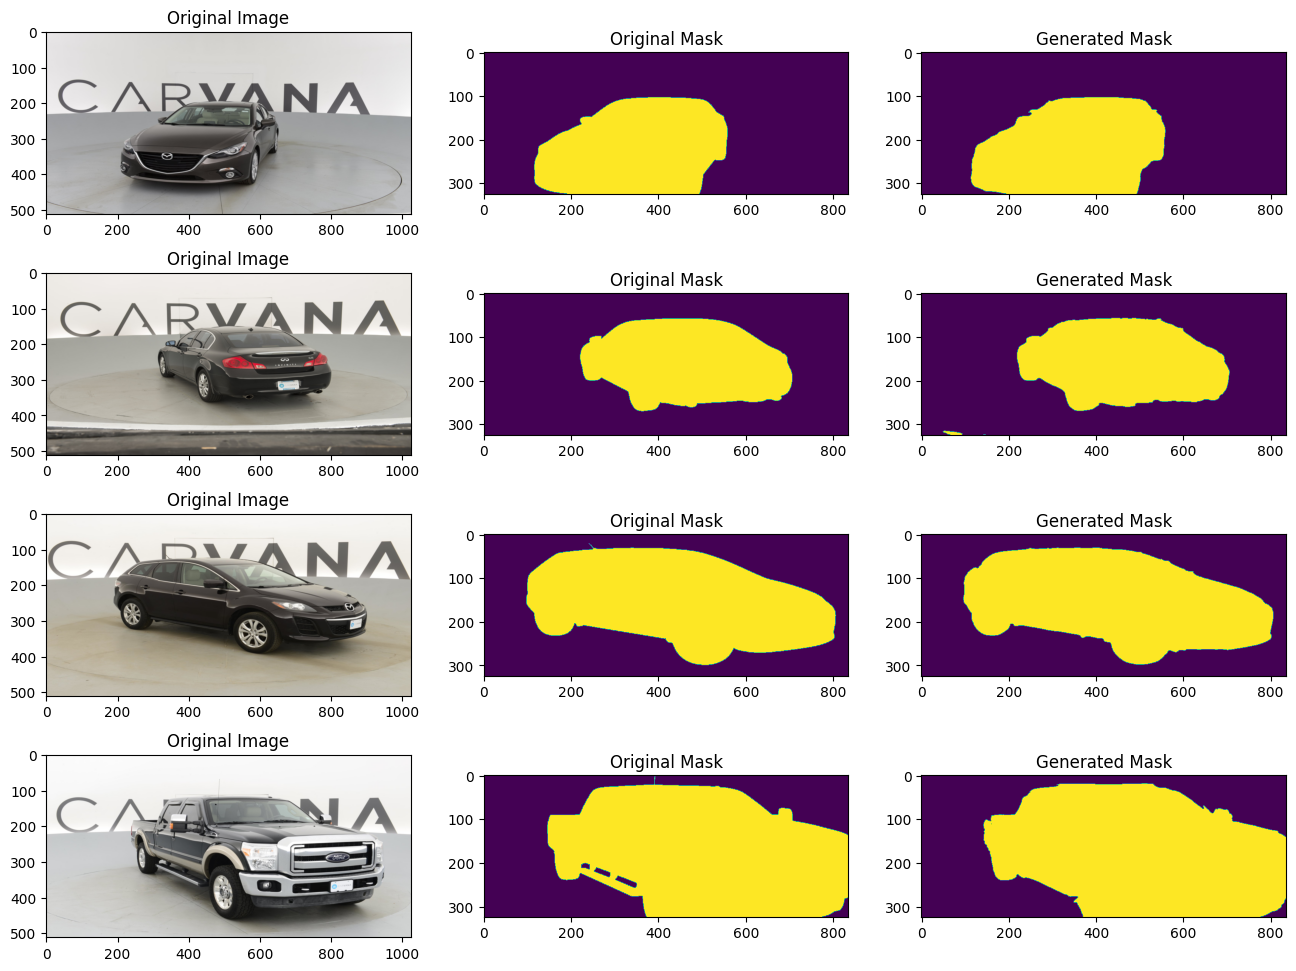

In [12]:
from utils import generate_and_display_BCE
from model import UNet
import torch

model_0 = UNet(in_channels=3,
              out_channels=1)

model_0.load_state_dict(torch.load("models/UNet-Carvana-0.1-40epochs.pth"))
generate_and_display_BCE(model=model_0,
                     dataset=val_dataset,
                     samples=4,
                     device="cpu")


In [13]:
from evaluate_model import evaluate_model_BCE

evaluate_model_BCE(model=model_0,
               dataloader=val_dataloader,
               device="cuda");

Evaluation Loss: 0.02124 | Evaluation Accuracy: 0.99%


In [7]:
import numpy as np
from scipy.ndimage import distance_transform_edt, binary_erosion
from skimage.measure import label

class WeightMap:
    def __init__(self, w0=10, sigma=5):
        self.w0 = w0
        self.sigma = sigma

    def compute_wc(self, mask):
        # binary mask → class weights
        classes, counts = np.unique(mask, return_counts=True)
        freq = counts / counts.sum()
        class_weight = {cls: 1.0 / freq[i] for i, cls in enumerate(classes)}

        wc = np.zeros_like(mask, dtype=np.float32)
        for cls, w in class_weight.items():
            wc[mask == cls] = w
        return wc

    def compute_d1_d2(self, instance_mask):
        h, w = instance_mask.shape
        borders = []

        instance_ids = [i for i in np.unique(instance_mask) if i != 0]

        for inst in instance_ids:
            obj = (instance_mask == inst)
            eroded = binary_erosion(obj)
            border = obj ^ eroded
            borders.append(border)

        if len(borders) == 0:
            return np.zeros((h, w)), np.zeros((h, w))

        distances = np.stack([distance_transform_edt(~b) for b in borders], axis=0)
        distance_sorted = np.sort(distances, axis=0)

        d1 = distance_sorted[0]
        d2 = distance_sorted[1] if len(distance_sorted) > 1 else np.full_like(d1, 1e-6)

        return d1, d2

    def compute_weight_map(self, binary_mask):
        instance_mask = label(binary_mask)

        wc = self.compute_wc(binary_mask)
        d1, d2 = self.compute_d1_d2(instance_mask)

        boundary_term = self.w0 * np.exp(-((d1 + d2)**2) / (2 * (self.sigma**2)))
        return (wc + boundary_term).astype(np.float32)

w = WeightMap(w0= 10, sigma=5).compute_weight_map(binary_mask=(y_1*255).squeeze().type(torch.int32).numpy())
w.shape

/usr/lib/python3/dist-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 45.0.0.
  "class": algorithms.Blowfish,
/usr/lib/python3/dist-packages/paramiko/transport.py:261: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


(324, 836)

In [8]:
import torch
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step_CV(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """
    Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then runs through all of 
    the required training steps.

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """
    wm = WeightMap(w0=10, sigma=5)
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        wmap = wm.compute_weight_map((y*255).squeeze().cpu().numpy())
        y_preds = model(X)
        y_preds_labels = torch.sigmoid(y_preds)
        binary_preds_labels = torch.round(y_preds_labels).type(torch.int32)
        loss = (torch.tensor(wmap).unsqueeze(dim=0).to(device) * loss_fn(y_preds.squeeze(dim=1), (y*255).squeeze(dim=1))).mean()
        train_loss += loss
        acc = torch.sum(binary_preds_labels==(y*255).type(torch.int32)).item()/y.numel()
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step_CV(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:

    """
    Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to evaluation mode and then runs through all of 
    the required testing steps.

    Args:
    model: A PyTorch model to be evaluated.
    dataloader: A DataLoader instance for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form of (training_loss, training_acc). FOr example:

    (0.1112, 0.8743)
    """
    wm = WeightMap(w0=10, sigma=5)
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            wmap = wm.compute_weight_map((y*255).squeeze().cpu().numpy())
            test_preds = model(X)
            test_preds_labels = torch.sigmoid(test_preds)
            loss = (torch.tensor(wmap).unsqueeze(dim=0).to(device) * loss_fn(test_preds.squeeze(dim=1), (y*255).squeeze(dim=1))).mean()
            test_preds_labels = torch.round(test_preds_labels).type(torch.int32)
            acc = torch.sum(test_preds_labels==(y*255).squeeze().type(torch.int32)).item()/y.numel()
            test_loss += loss
            test_acc += acc

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

def train_CV(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          device: torch.device) -> Dict[str, List[float]]:

    """Trains a PyTorch model for the number of input epochs.

    Passes a target PyTorch model through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Args:
    model: A PyTorch model to be trained.
    train_dataloader: A PyTOrch dataloader for the model to be trained on.
    test_dataloader: A PyTorch dataloader for the model to be evaluated on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g "cuda" or "cpu")

    Returns:
    A dictionary containing the training and testing loss as well as accuracy
    metrics. Each metric has a value in a list for each epoch.
    In the form: {train_loss: [...],
                    train_acc: [...],
                    test_loss: [...],
                    test_acc: [...]}

    For example if training for epochs = 3:
                {train_loss: [2.0619, 1.0537, 0.9124],
                train_acc: [0.39, 0.42, 0.56],
                test_loss: [2.1319, 1.5667, 1.1234],
                test_acc: [0.37, 0.48, 0.67]}
    """
    results = {"train_loss" :[],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step_CV(model = model,
                                           dataloader= train_dataloader,
                                           loss_fn= loss_fn,
                                           optimizer= optimizer,
                                           device = device)
        test_loss, test_acc = test_step_CV(model = model,
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)

        print(f" Epoch {epoch + 1} |"
                f" train_loss: {train_loss:.4f} |"
                f" train_acc: {train_acc:.4f} |"
                f" test_loss: {test_loss:.4f} |"
                f" test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [ ]:
from model import UNet

device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = UNet(in_channels=3,
               out_channels=1).to(device=device)

model_0.load_state_dict(torch.load("models/UNet-Carvana-0.1-20epochs-wm.pth"))

loss_fn = torch.nn.BCEWithLogitsLoss(reduction="none")
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01,
                            momentum=0.9)

optimizer.load_state_dict(torch.load("optimizers/UNet-Carvana-0.1-20epochs-wm.pth"))

results = train_CV(model= model_0,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     loss_fn=loss_fn,
                     optimizer=optimizer,
                     device= device,
                    epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

 Epoch 1 | train_loss: 0.1707 | train_acc: 0.9921 | test_loss: 0.1638 | test_acc: 0.9927
 Epoch 2 | train_loss: 0.1639 | train_acc: 0.9923 | test_loss: 0.1681 | test_acc: 0.9927
 Epoch 3 | train_loss: 0.1928 | train_acc: 0.9899 | test_loss: 0.1519 | test_acc: 0.9932
 Epoch 4 | train_loss: 0.1484 | train_acc: 0.9933 | test_loss: 0.1780 | test_acc: 0.9916
 Epoch 5 | train_loss: 0.1890 | train_acc: 0.9899 | test_loss: 0.1700 | test_acc: 0.9915
 Epoch 6 | train_loss: 0.1346 | train_acc: 0.9940 | test_loss: 0.1420 | test_acc: 0.9936
 Epoch 7 | train_loss: 0.1301 | train_acc: 0.9943 | test_loss: 0.1332 | test_acc: 0.9943
 Epoch 8 | train_loss: 0.1229 | train_acc: 0.9947 | test_loss: 0.1308 | test_acc: 0.9944
 Epoch 9 | train_loss: 0.1200 | train_acc: 0.9949 | test_loss: 0.1999 | test_acc: 0.9887
 Epoch 10 | train_loss: 1.5886 | train_acc: 0.5856 | test_loss: 1.8347 | test_acc: 0.3934
 Epoch 11 | train_loss: 1.8206 | train_acc: 0.4033 | test_loss: 1.8347 | test_acc: 0.3934
 Epoch 12 | train_l

In [15]:
from evaluate_model import evaluate_model_BCE
model_0 = UNet(in_channels=3,
              out_channels=1)

model_0.load_state_dict(torch.load("models/UNet-Carvana-0.1-20epochs.pth"))
evaluate_model_BCE(model=model_0,
               dataloader=val_dataloader,
               device="cuda");

Evaluation Loss: 0.03623 | Evaluation Accuracy: 0.99%


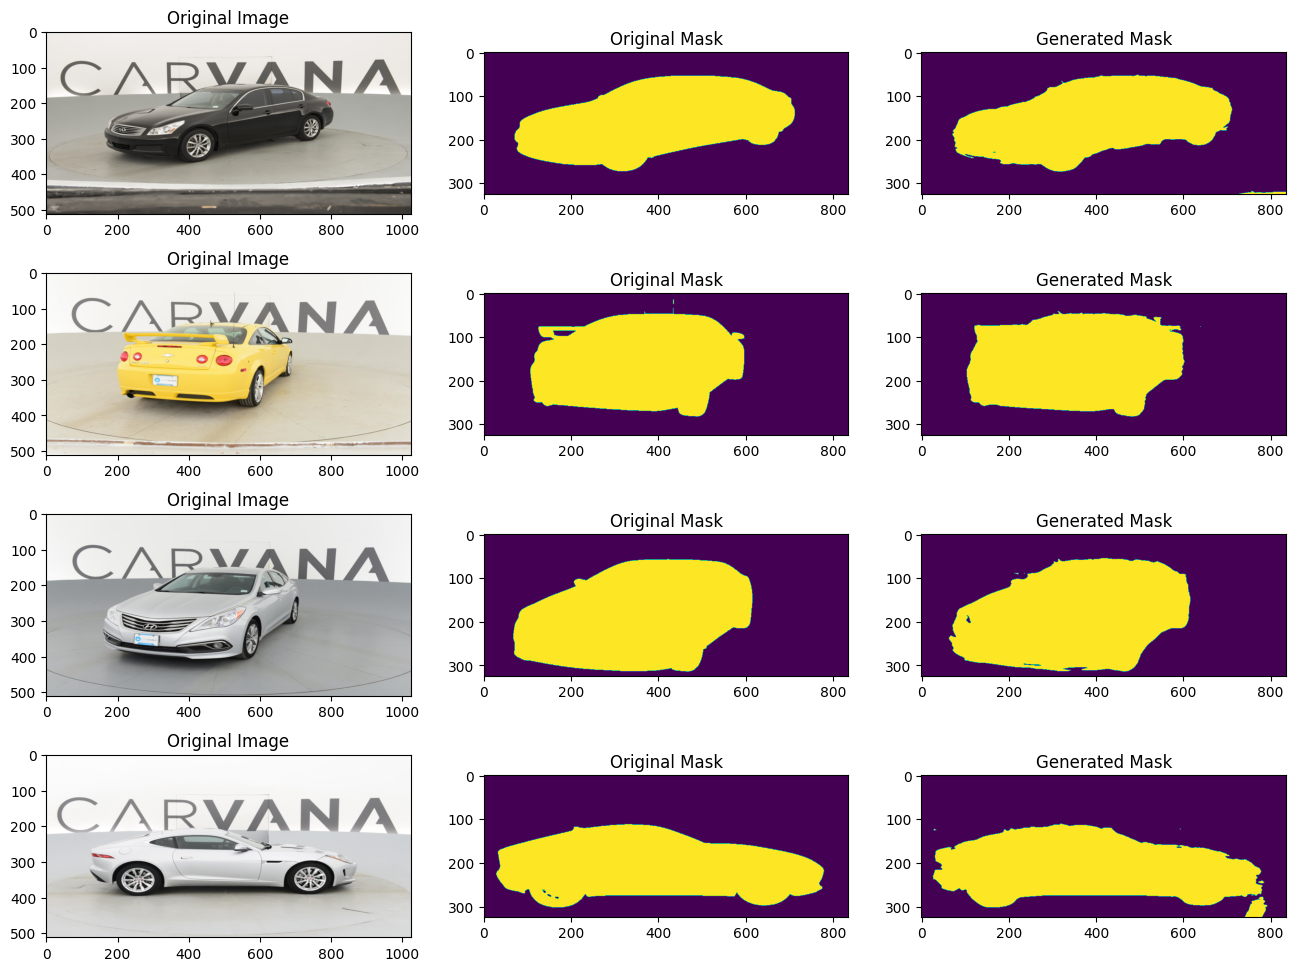

In [13]:
from utils import generate_and_display_BCE
from model import UNet
import torch

model_0 = UNet(in_channels=3,
              out_channels=1)

model_0.load_state_dict(torch.load("models/UNet-Carvana-0.1-20epochs-wm.pth"))
generate_and_display_BCE(model=model_0,
                     dataset=val_dataset,
                     samples=4,
                     device="cpu")


In [23]:
%%writefile train.py
from model import UNet
from download_data import download_data
from data_setup import choose_dataloader
import engine
import utils
import evaluate_model
import argparse
from typing import Tuple
import torch
import torch.nn as nn
from torchvision import transforms

parser = argparse.ArgumentParser()
parser.add_argument("--dataset_name", type= str, help= "Provide name of dataset to download as string (e.g 'ISBI', 'Cityscape', 'Carvana')")
# parser.add_argument("--scale_factor", type= float, help= "Provide the scale factor that you would like to scale the data to (e.g '0.5' or '0.25' or '1.0'")
parser.add_argument("--batch_size", type= int, help= "Provide the batch size to train the model on (e.g '1', '4', '8' ...). Provide '1' if 'weight_map' is active.")
parser.add_argument("--sample_size", type= float, help= "Provide the sample size to use from the original large dataset (e.g '0.1', '0.3', '0.5'). Its the percentage of data to use for experiments.")
parser.add_argument("--num_workers", type= int, help="Provide the number of workers to use (e.g '4', '8', '16')")
parser.add_argument("--use_weight_map", action="store_true", help="if flag is used, the loss will be computed using the weight map strategy of the original paper, else simple loss will be computed.")
parser.add_argument("--load_checkpoint", type= str, help= "Provide a valid checkpoint name (model & optimizer) that ends with '.pt' or '.pth'")
parser.add_argument("--checkpoint_name", type= str, help= "Provide a save name for checkpoint (e.g 'UNet-Carvana-20epochs.pth')")
parser.add_argument("--epochs", type= int, help= "Provide the number of epochs to train the model for (e.g '5', '10', '15')")

args = parser.parse_args()

device = "cuda" if torch.cuda.is_available() else "cpu"

data_path = download_data(dataset_name=args.dataset_name)

if data_path.stem == "ISBI":
    transforms = transforms.Compose([transforms.Resize(size=(512, 512)),
                                     transforms.ToTensor()
                                    ])
else:
    transforms = transforms.Compose([transforms.Resize(size=(512, 1024)),
                                     transforms.ToTensor()
                                    ])

train_dataloader, test_dataloader, val_dataloader, train_dataset, test_dataset, val_dataset = choose_dataloader(data_path= data_path,
                                                                                                                dataset_name=args.dataset_name,
                                                                                                               transforms=transforms,
                                                                                                               batch_size= args.batch_size,
                                                                                                               num_workers = args.num_workers,
                                                                                                               sample_size = args.sample_size)

print(args.use_weight_map)
if data_path.stem == "ISBI":
    model_0 = UNet(in_channels=1,
                   out_channels=1)
    if args.use_weight_map:
        loss_fn = nn.BCEWithLogitsLoss(reduction = "none")
    else:
        loss_fn = nn.BCEWithLogitsLoss()
    
elif data_path.stem == "CityScape":
    model_0 = UNet(in_channels=3,
                   out_channels=34)
    loss_fn = nn.CrossEntropyLoss()
    
else:
    model_0 = UNet(in_channels=3,
                   out_channels=1)
    if args.use_weight_map:
        loss_fn = nn.BCEWithLogitsLoss(reduction = "none")
    else:
        loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01,
                            momentum=0.9)

if args.load_checkpoint:
    model_0, optimizer = utils.load_checkpoint(model= model_0,
                                               optimizer= optimizer,
                                               checkpoint_name= args.load_checkpoint,
                                               device= device)

if data_path.stem == "ISBI":
    results = engine.train_ISBI(model= model_0,
                                train_dataloader= train_dataloader,
                                test_dataloader= test_dataloader,
                                optimizer= optimizer,
                                loss_fn= loss_fn,
                                device= device,
                               epochs=args.epochs,
                               weight_map=args.use_weight_map)
elif data_path.stem == "CityScape":
    results = engine.train_CS(model= model_0,
                                train_dataloader= train_dataloader,
                                test_dataloader= test_dataloader,
                                optimizer= optimizer,
                                loss_fn= loss_fn,
                                device= device,
                             epochs= args.epochs)
else:
    results = engine.train_CV(model= model_0,
                                train_dataloader= train_dataloader,
                                test_dataloader= test_dataloader,
                                optimizer= optimizer,
                                loss_fn= loss_fn,
                                device= device,
                             epochs = args.epochs,
                             weight_map= args.use_weight_map)

if args.checkpoint_name:
    utils.save_checkpoint(model= model_0,
                          optimizer= optimizer,
                          model_target_dir= "models",
                          optimizer_target_dir= "optimizers",
                          checkpoint_name=args.checkpoint_name)

else:
    utils.save_checkpoint(model= model_0,
                          optimizer= optimizer,
                          model_target_dir= "models",
                          optimizer_target_dir= "optimizers",
                          checkpoint_name=f"UNet-{data_path.stem}-{args.sample_size}-{args.epochs}.pth")

if data_path.stem == "ISBI" or data_path.stem == "Carvana":
    evaluate_model.evaluate_model_binaryclass(model= model_0,
                                              dataloader= val_dataloader,
                                              loss_fn= loss_fn,
                                              device= device)

else:
    evaluate_model.evaluate_model_multiclass(model= model_0,
                                          dataloader= val_dataloader,
                                          loss_fn= loss_fn,
                                          device= device)

Overwriting train.py


In [30]:
!python3 train.py --dataset_name "Carvana" --batch_size 3 --sample_size 0.01 --num_workers 4 --epochs 2

/usr/lib/python3/dist-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 45.0.0.
  "class": algorithms.Blowfish,
/usr/lib/python3/dist-packages/paramiko/transport.py:261: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,
/home/sarmadahmad8/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import